In [1]:
with open("rent-ideal.csv") as f:
    for line in f.readlines()[0:5]:
        print(line.strip())

bedrooms,bathrooms,latitude,longitude,price
3,1.5,40.7145,-73.9425,3000
2,1.0,40.7947,-73.9667,5465
1,1.0,40.7388,-74.0018,2850
1,1.0,40.7539,-73.9677,3275


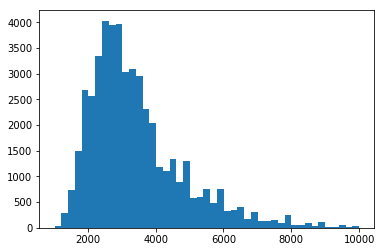

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("rent-ideal.csv")
fig, ax = plt.subplots()
ax.hist(df.price, bins=45)
plt.show()

In [5]:
import pandas as pd   # import the library and give a short alias: pd
df = pd.read_csv("rent-ideal.csv")
df.head()

,bedrooms,bathrooms,latitude,longitude,price
0,3,1.5,40.7145,-73.9425,3000
1,2,1.0,40.7947,-73.9667,5465
2,1,1.0,40.7388,-74.0018,2850
3,1,1.0,40.7539,-73.9677,3275
4,4,1.0,40.8241,-73.9493,3350


In [6]:
df.head(2).T

,0,1
bedrooms,3.0000,2.0000
bathrooms,1.5000,1.0000
latitude,40.7145,40.7947
longitude,-73.9425,-73.9667
price,3000.0000,5465.0000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48266 entries, 0 to 48265
Data columns (total 5 columns):
bedrooms     48266 non-null int64
bathrooms    48266 non-null float64
latitude     48266 non-null float64
longitude    48266 non-null float64
price        48266 non-null int64
dtypes: float64(3), int64(2)
memory usage: 1.8 MB


In [8]:
print(df.columns)

Index(['bedrooms', 'bathrooms', 'latitude', 'longitude', 'price'], dtype='object')


In [9]:
df.describe()

,bedrooms,bathrooms,latitude,longitude,price
count,48266.000000,48266.000000,48266.00000,48266.000000,48266.000000
mean,1.508950,1.178438,40.75074,-73.972496,3439.486595
std,1.092364,0.426243,0.03943,0.029112,1401.181424
min,0.000000,0.000000,40.57120,-74.121500,1025.000000
25%,1.000000,1.000000,40.72810,-73.991700,2495.000000
50%,1.000000,1.000000,40.75160,-73.977900,3100.000000
75%,2.000000,1.000000,40.77390,-73.954700,4000.000000
max,8.000000,10.000000,40.89890,-73.750900,9999.000000


In [10]:
print(df.mean())

bedrooms        1.508950
bathrooms       1.178438
latitude       40.750740
longitude     -73.972496
price        3439.486595
dtype: float64


In [11]:
print(df.bedrooms.value_counts())

1    15709
2    14435
0     9428
3     6776
4     1710
5      169
6       36
8        2
7        1
Name: bedrooms, dtype: int64


In [12]:
df.sort_values('price', ascending=False).head()

,bedrooms,bathrooms,latitude,longitude,price
17947,6,3.0,40.7287,-73.9856,9999
27912,3,3.0,40.7934,-73.9743,9999
47506,6,3.0,40.7287,-73.9856,9999
36475,3,2.0,40.7320,-73.9885,9995
4604,2,2.5,40.7285,-73.9902,9995


In [13]:
print(type(df.price))
print(df.price.head(5))

<class 'pandas.core.series.Series'>
0    3000
1    5465
2    2850
3    3275
4    3350
Name: price, dtype: int64


In [14]:
prices = df.price
print(prices.min(), prices.mean(), prices.max())

1025 3439.486595118717 9999


In [15]:
bedprice = df[['bathrooms','price']]
print(type(bedprice))
bedprice.head()

<class 'pandas.core.frame.DataFrame'>


,bathrooms,price
0,1.5,3000
1,1.0,5465
2,1.0,2850
3,1.0,3275
4,1.0,3350


In [16]:
X = df.drop('price', axis=1) # get all but price column
y = df['price']
X.head(3)

,bedrooms,bathrooms,latitude,longitude
0,3,1.5,40.7145,-73.9425
1,2,1.0,40.7947,-73.9667
2,1,1.0,40.7388,-74.0018


In [17]:
print(type(df.iloc[0]))
print(df.iloc[0])

<class 'pandas.core.series.Series'>
bedrooms        3.0000
bathrooms       1.5000
latitude       40.7145
longitude     -73.9425
price        3000.0000
Name: 0, dtype: float64


In [18]:
df.iloc[0:2]

,bedrooms,bathrooms,latitude,longitude,price
0,3,1.5,40.7145,-73.9425,3000
1,2,1.0,40.7947,-73.9667,5465


In [19]:
print(df.iloc[0,:])    

bedrooms        3.0000
bathrooms       1.5000
latitude       40.7145
longitude     -73.9425
price        3000.0000
Name: 0, dtype: float64


In [20]:
print(df.iloc[0,[0,4]])

bedrooms       3.0
price       3000.0
Name: 0, dtype: float64


In [21]:
print(df.iloc[0][['bedrooms','price']])

bedrooms       3.0
price       3000.0
Name: 0, dtype: float64


In [22]:
df.head(3)

,bedrooms,bathrooms,latitude,longitude,price
0,3,1.5,40.7145,-73.9425,3000
1,2,1.0,40.7947,-73.9667,5465
2,1,1.0,40.7388,-74.0018,2850


In [24]:
print(df.loc[1])

bedrooms        2.0000
bathrooms       1.0000
latitude       40.7947
longitude     -73.9667
price        5465.0000
Name: 1, dtype: float64


In [25]:
dfi = df.set_index('bedrooms') # set_index() returns new view of df
dfi.head()

,bathrooms,latitude,longitude,price
bedrooms,,,,
3,1.5,40.7145,-73.9425,3000
2,1.0,40.7947,-73.9667,5465
1,1.0,40.7388,-74.0018,2850
1,1.0,40.7539,-73.9677,3275
4,1.0,40.8241,-73.9493,3350


In [26]:
dfi.loc[3].head()

,bathrooms,latitude,longitude,price
bedrooms,,,,
3,1.5,40.7145,-73.9425,3000
3,1.0,40.7454,-73.9845,4395
3,1.0,40.7231,-74.0044,3733
3,1.0,40.7660,-73.9914,4500
3,2.0,40.7196,-74.0109,6320


In [27]:
dfi = dfi.reset_index() # overcome quirk in Pandas
dfi.head(3)

,bedrooms,bathrooms,latitude,longitude,price
0,3,1.5,40.7145,-73.9425,3000
1,2,1.0,40.7947,-73.9667,5465
2,1,1.0,40.7388,-74.0018,2850


In [28]:
bybaths = df.groupby(['bathrooms']).mean()
bybaths

,bedrooms,latitude,longitude,price
bathrooms,,,,
0.0,0.830000,40.756105,-73.970058,3144.870000
1.0,1.252169,40.750845,-73.972149,3028.111035
1.5,2.277259,40.748906,-73.965895,4226.336449
2.0,2.687433,40.749509,-73.975563,5278.595739
2.5,2.863158,40.756201,-73.965147,6869.047368
3.0,3.296610,40.759722,-73.967560,6897.974576
3.5,3.857143,40.748650,-73.954836,7635.357143
4.0,4.622222,40.756262,-73.956311,7422.888889
4.5,1.000000,40.857200,-73.935000,2050.000000


In [29]:
bybaths = bybaths.reset_index() # overcome quirk in Pandas
bybaths

,bathrooms,bedrooms,latitude,longitude,price
0,0.0,0.830000,40.756105,-73.970058,3144.870000
1,1.0,1.252169,40.750845,-73.972149,3028.111035
2,1.5,2.277259,40.748906,-73.965895,4226.336449
3,2.0,2.687433,40.749509,-73.975563,5278.595739
4,2.5,2.863158,40.756201,-73.965147,6869.047368
5,3.0,3.296610,40.759722,-73.967560,6897.974576
6,3.5,3.857143,40.748650,-73.954836,7635.357143
7,4.0,4.622222,40.756262,-73.956311,7422.888889
8,4.5,1.000000,40.857200,-73.935000,2050.000000
9,10.0,2.000000,40.763300,-73.984900,3600.000000


In [30]:
bybaths[['bathrooms','price']]

,bathrooms,price
0,0.0,3144.870000
1,1.0,3028.111035
2,1.5,4226.336449
3,2.0,5278.595739
4,2.5,6869.047368
5,3.0,6897.974576
6,3.5,7635.357143
7,4.0,7422.888889
8,4.5,2050.000000
9,10.0,3600.000000


In [31]:
len(df[df.bathrooms==0])

300

In [32]:
print(df.price.isnull().head(3))

0    False
1    False
2    False
Name: price, dtype: bool


In [33]:
df.isnull().head(3)

,bedrooms,bathrooms,latitude,longitude,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False


In [34]:
df.isnull().any()

bedrooms     False
bathrooms    False
latitude     False
longitude    False
price        False
dtype: bool

In [35]:
(df.price>3000).head()

0    False
1     True
2    False
3     True
4     True
Name: price, dtype: bool

In [36]:
df[df.price>3000].head(3)

,bedrooms,bathrooms,latitude,longitude,price
1,2,1.0,40.7947,-73.9667,5465
3,1,1.0,40.7539,-73.9677,3275
4,4,1.0,40.8241,-73.9493,3350


In [37]:
df[(df.price>1000) & (df.price<3000)].head(3)

,bedrooms,bathrooms,latitude,longitude,price
2,1,1.0,40.7388,-74.0018,2850
8,1,1.0,40.8234,-73.9457,1725
10,0,1.0,40.7769,-73.9467,1950


In [38]:
df[(df.bedrooms>=2) & (df.price<3000)].head(3)

,bedrooms,bathrooms,latitude,longitude,price
21,2,1.0,40.7427,-73.9794,2999
34,2,1.0,40.8440,-73.9404,2300
54,2,2.0,40.7059,-73.8339,2100


In [39]:
df_aug = df.copy()
df_aug['junk'] = 0
df_aug.head(3)

,bedrooms,bathrooms,latitude,longitude,price,junk
0,3,1.5,40.7145,-73.9425,3000,0
1,2,1.0,40.7947,-73.9667,5465,0
2,1,1.0,40.7388,-74.0018,2850,0


In [40]:
import numpy as np
df_aug['junk'] = np.random.random(size=len(df_aug))
df_aug.head(3)

,bedrooms,bathrooms,latitude,longitude,price,junk
0,3,1.5,40.7145,-73.9425,3000,0.891901
1,2,1.0,40.7947,-73.9667,5465,0.442661
2,1,1.0,40.7388,-74.0018,2850,0.099240


In [42]:
bedsprices = df[['bedrooms','price']] # a view or a copy of df?
bedsprices['beds_to_price_ratio'] = bedsprices.bedrooms / bedsprices.price

/Users/rasoh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
bedsprices = df[['bedrooms','price']].copy() # make a copy of 2 cols of df
bedsprices['price_to_beds_ratio'] = bedsprices.price / bedsprices.bedrooms
bedsprices.head(3)

,bedrooms,price,price_to_beds_ratio
0,3,3000,1000.0
1,2,5465,2732.5
2,1,2850,2850.0


In [45]:
df_raw = pd.read_csv("rent.csv", parse_dates=['created'])
df_rent = df_raw[['created','features','bedrooms','bathrooms','price']]
df_rent.head()

,created,features,bedrooms,bathrooms,price
0,2016-06-24 07:54:24,[],3,1.5,3000
1,2016-06-12 12:19:27,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",2,1.0,5465
2,2016-04-17 03:26:41,"['Laundry In Building', 'Dishwasher', 'Hardwoo...",1,1.0,2850
3,2016-04-18 02:22:02,"['Hardwood Floors', 'No Fee']",1,1.0,3275
4,2016-04-28 01:32:41,['Pre-War'],4,1.0,3350


In [46]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 5 columns):
created      49352 non-null datetime64[ns]
features     49352 non-null object
bedrooms     49352 non-null int64
bathrooms    49352 non-null float64
price        49352 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.9+ MB


In [47]:
df_aug = df_rent.copy()  # alter a copy of dataframe
df_aug['features'] = df_aug['features'].str.lower() # normalize to lower case
df_aug.head()

,created,features,bedrooms,bathrooms,price
0,2016-06-24 07:54:24,[],3,1.5,3000
1,2016-06-12 12:19:27,"['doorman', 'elevator', 'fitness center', 'cat...",2,1.0,5465
2,2016-04-17 03:26:41,"['laundry in building', 'dishwasher', 'hardwoo...",1,1.0,2850
3,2016-04-18 02:22:02,"['hardwood floors', 'no fee']",1,1.0,3275
4,2016-04-28 01:32:41,['pre-war'],4,1.0,3350


In [48]:
df_aug['features'] = df_aug['features'].fillna('') # fill missing w/blanks
df_aug['features'] = df_aug['features'].replace('[]','') # fill empty w/blanks
df_aug.head()

,created,features,bedrooms,bathrooms,price
0,2016-06-24 07:54:24,,3,1.5,3000
1,2016-06-12 12:19:27,"['doorman', 'elevator', 'fitness center', 'cat...",2,1.0,5465
2,2016-04-17 03:26:41,"['laundry in building', 'dishwasher', 'hardwoo...",1,1.0,2850
3,2016-04-18 02:22:02,"['hardwood floors', 'no fee']",1,1.0,3275
4,2016-04-28 01:32:41,['pre-war'],4,1.0,3350


In [49]:
df_aug['doorman'] = df_aug['features'].str.contains("doorman")
df_aug['laundry'] = df_aug['features'].str.contains("laundry|washer")
df_aug.head()

,created,features,bedrooms,bathrooms,price,doorman,laundry
0,2016-06-24 07:54:24,,3,1.5,3000,False,False
1,2016-06-12 12:19:27,"['doorman', 'elevator', 'fitness center', 'cat...",2,1.0,5465,True,False
2,2016-04-17 03:26:41,"['laundry in building', 'dishwasher', 'hardwoo...",1,1.0,2850,False,True
3,2016-04-18 02:22:02,"['hardwood floors', 'no fee']",1,1.0,3275,False,False
4,2016-04-28 01:32:41,['pre-war'],4,1.0,3350,False,False


In [50]:
df_aug = df_raw[['created','interest_level']].copy()
print(f"type of interest_level is {df_aug.interest_level.dtype}")
df_aug.head()

type of interest_level is object


,created,interest_level
0,2016-06-24 07:54:24,medium
1,2016-06-12 12:19:27,low
2,2016-04-17 03:26:41,high
3,2016-04-18 02:22:02,low
4,2016-04-28 01:32:41,low


In [51]:
m = {'low':1,'medium':2,'high':3}
df_aug['interest_level'] = df_aug['interest_level'].map(m)
print(f"type of interest_level is {df_aug.interest_level.dtype}")
df_aug.head()

type of interest_level is int64


,created,interest_level
0,2016-06-24 07:54:24,2
1,2016-06-12 12:19:27,1
2,2016-04-17 03:26:41,3
3,2016-04-18 02:22:02,1
4,2016-04-28 01:32:41,1


In [52]:
df_aug['interest_level'] = df_aug['interest_level'].astype('int8')
print(f"type of interest_level is {df_aug.interest_level.dtype}")

type of interest_level is int8


In [53]:
df_aug['dayofweek'] = df_aug['created'].dt.dayofweek  # add dow column
df_aug['day'] = df_aug['created'].dt.day
df_aug['month'] = df_aug['created'].dt.month
df_aug[['created','dayofweek','day','month']].head()

,created,dayofweek,day,month
0,2016-06-24 07:54:24,4,24,6
1,2016-06-12 12:19:27,6,12,6
2,2016-04-17 03:26:41,6,17,4
3,2016-04-18 02:22:02,0,18,4
4,2016-04-28 01:32:41,3,28,4
